# Group 1 Data set

You own a supermarket mall and through membership cards, you have some basic data about
your customers like Customer ID, age, gender, annual income, and spending score.
Spending Score is something you assign to the customer based on your defined parameters like
customer behavior and purchasing data.
Problem Statement
You own the mall and want to understand the customers who can easily converge [Target
Customers] so that the information can be given to the marketing team to plan the strategy
accordingly.
It is a customer segmentation problem

# Part 1 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\sgovind\OneDrive - Intel Corporation\Desktop\Personal\bits pilani\unsupervised learning\Mini project 2\Mall_customers\Mall_Customers.csv')
df = dataset.copy()

In [4]:
# Visualizing data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# GEtting the insides of the data
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Making  the independent variables matrix
X = df.iloc[:, [3, 4]].values

In [7]:
# One Hot Encoding the categorical data - Gender
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])

In [8]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


# Part 2 .1


In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

In [11]:
font_title = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

font_axes = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


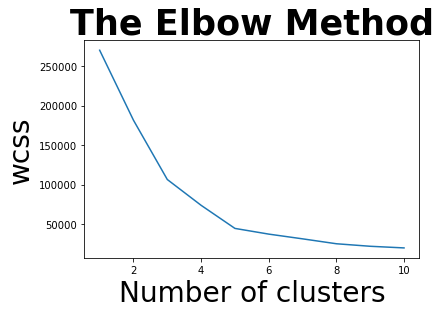

In [12]:
#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', **font_title)
plt.xlabel('Number of clusters', **font_axes)
plt.ylabel('wcss', **font_axes)
plt.show()

In [13]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


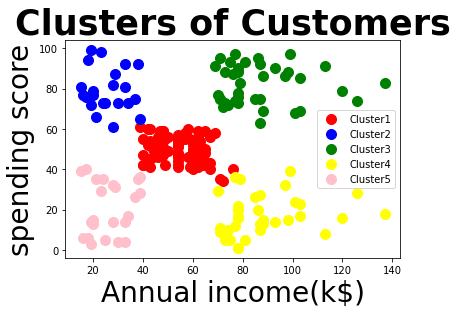

In [14]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers', **font_title)
plt.xlabel('Annual income(k$)', **font_axes)
plt.ylabel('spending score', **font_axes)
plt.legend()
plt.show()

# Part 2.2 

In [15]:
score = sklearn.metrics.silhouette_score(X, y_kmeans, metric='euclidean')

In [16]:
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sgovind\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

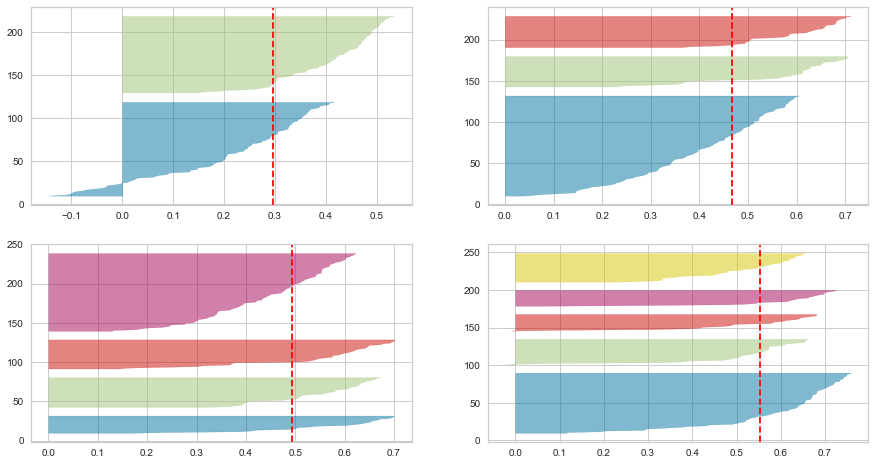

In [17]:
#Plot Silhouetter score for k =2,3,4,5 and obserev that it is highest for k=5

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# Part 3: Hierarchical clustering

# Part 3.1

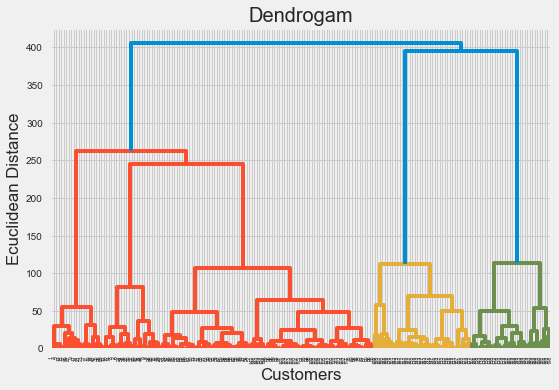

In [29]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

# Part3.2 
As in dendogram we can see there are 5 differnet clusters which is same as K=5 in previous part of Kmeans alogorithm 

# 3.3

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

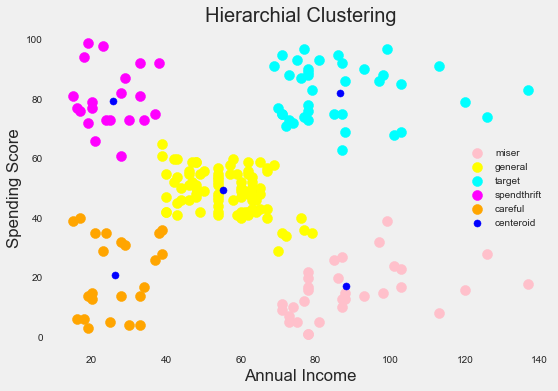

In [34]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [35]:
score = sklearn.metrics.silhouette_score(X, y_hc, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


# Part 4 DBSCAN

# Part 4.1 : Experiment with different min_pts and eps values and record number of clusters found in each experiment [4 marks]

In [45]:
from sklearn.cluster import DBSCAN

In [56]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [60]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sklearn.metrics.silhouette_score(X, DBS_clustering.labels_))

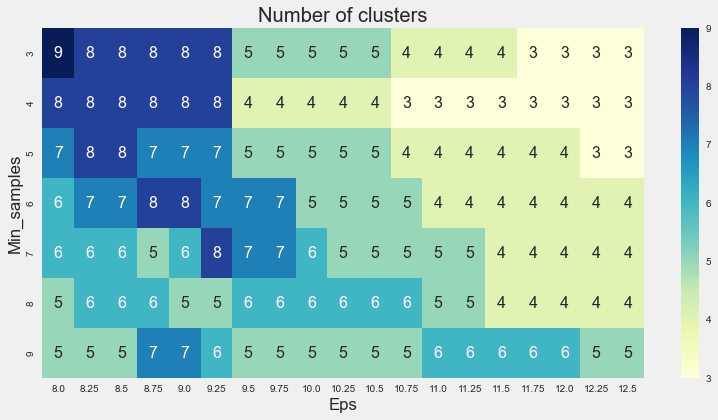

In [96]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

# Part 4.2 
#For each of the experiments in 1, report cluster validation metric [2 marks]

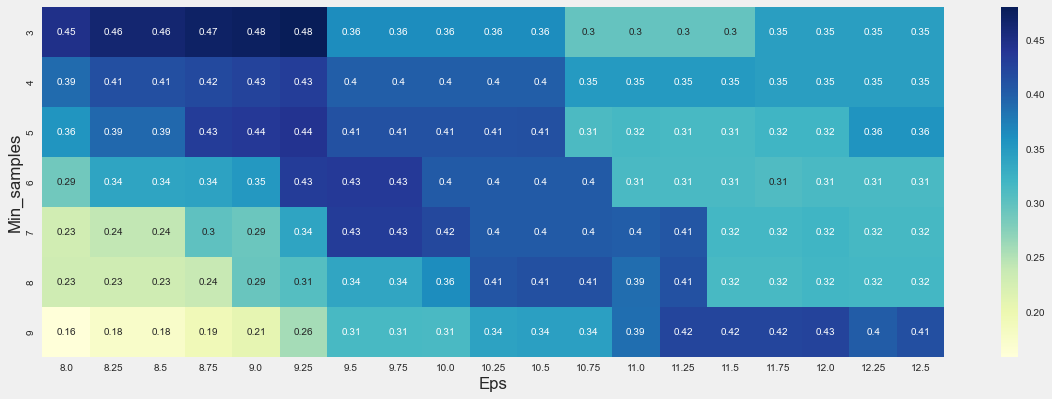

In [101]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
# 3
# For the experiment corresponding with best metric value, how does the number of clusters compare with k (found in part 1) 
# and n (found from dendrogram) in part 2?
# Comment about these values [1 mark]

# For k=5 or n=5 , in DBSCAN with cluter =5 we get maximum Sillhuette score of .41 with eps 10.25 and min samples = 5


# Part 5: Interpretation and plotting

Choose the labels corresponding to the best clustering (based on metric) from part 2,3,4 and

Reduce the data to 2 dimensions using PCA and plot clusters using color-coded scatter plot [3 marks]
Try to infer and make some observations about the clusters and what business insights can be derived from these results [2 marks]

# Part 5.1

In [102]:
dataset = pd.read_csv(r'C:\Users\sgovind\OneDrive - Intel Corporation\Desktop\Personal\bits pilani\unsupervised learning\Mini project 2\Mall_customers\Mall_Customers.csv')
mall = dataset.copy()

In [103]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


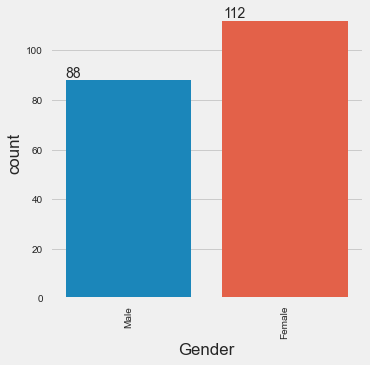

In [104]:
plt.figure(figsize = (5,5))
gender = mall['Gender'].sort_values(ascending = False)
ax = sns.countplot(x='Gender', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Data is not balanced, 27% more Females have participated than males

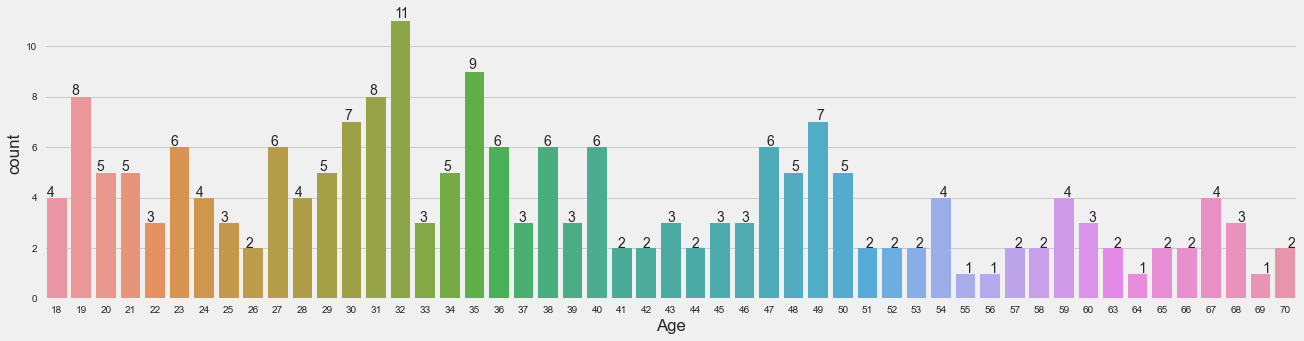

In [105]:
plt.figure(figsize = (20,5))
gender = mall['Age'].sort_values(ascending = False)
ax = sns.countplot(x='Age', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

In [ ]:
#Audience are from Age 18 to 70

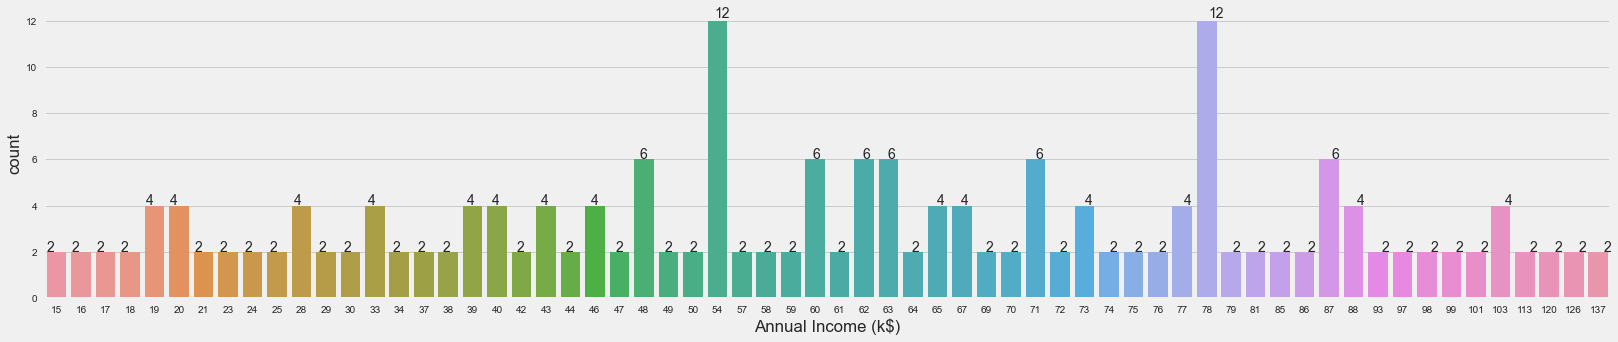

In [106]:
plt.figure(figsize = (25,5))
gender = mall['Annual Income (k$)'].sort_values(ascending = False)
ax = sns.countplot(x='Annual Income (k$)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()


In [ ]:
#Audience are from Annual Income(k$) range between 15 to 137

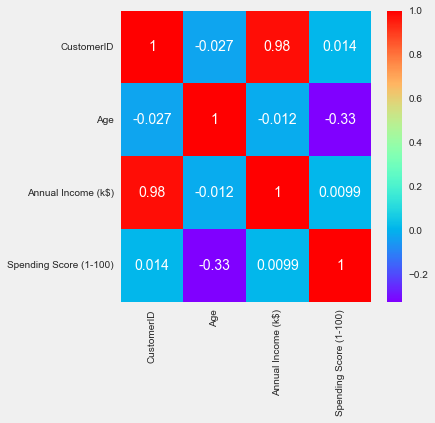

In [107]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (5,5))
sns.heatmap(mall.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [ ]:
#Age and Spending Score (1-100) are moderately correlated with correlation of -0.33

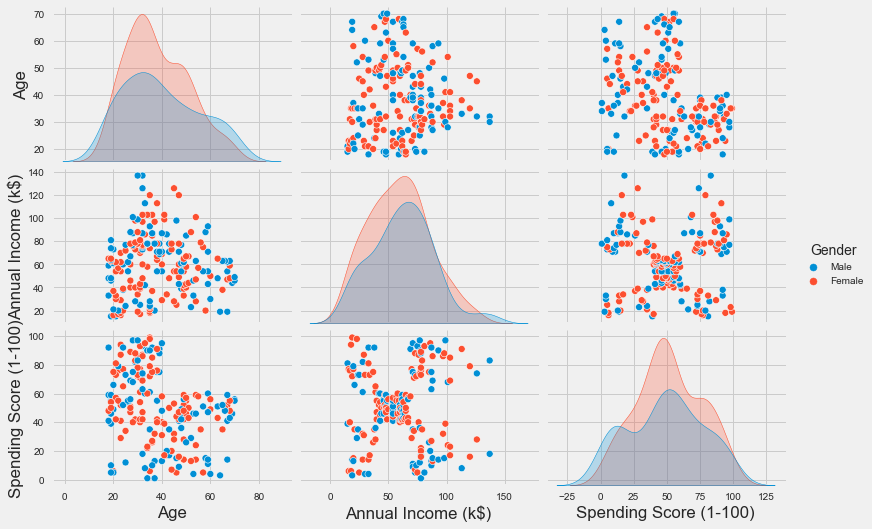

In [110]:
# Let's see our data in a detailed way with pairplot
X = mall.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [ ]:
#From the above plot we see that gender has no direct relation to segmenting customers. 
#That's why we can drop it.

In [111]:
from sklearn.decomposition import PCA
pca=PCA().fit(X)
print(pca.explained_variance_ratio_)
print()
print(X.columns.values.tolist())
print(pca.components_)

[0.45125272 0.44098465 0.10776263]

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
[[-0.1889742   0.58864102  0.7859965 ]
 [ 0.1309652   0.80837573 -0.57391358]
 [ 0.97320957  0.00551667  0.22985365]]


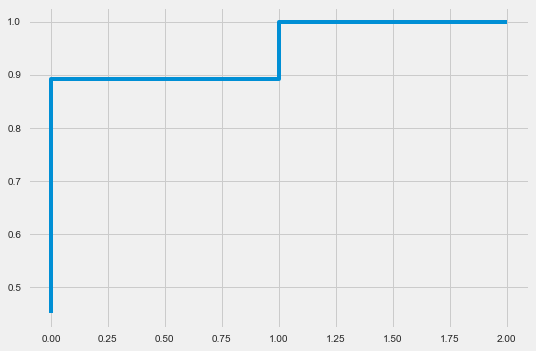

In [112]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

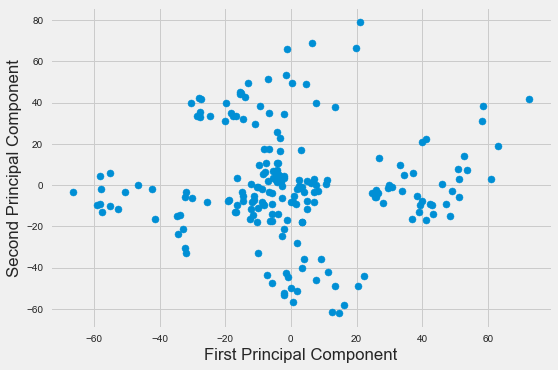

In [113]:
pca=PCA(n_components=2)
pca.fit(X)
reduced_data=pca.transform(X)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [114]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

,Dim1,Dim2
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005
5,-2.178278,-52.226581
6,-59.066057,-9.541707
7,12.369326,-61.617684
8,-66.315657,-3.213599
9,-5.656775,-47.266453


# Part 5.2 

We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall (please see figure in [14])



In cluster 4(yellow colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

In cluster 2(blue colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

In cluster 5(pink colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

In cluster 1(red-colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

In cluster 3(green colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to cluster 3 and cluster 5 and should also maintain its standards to keep the people belonging to cluster 1 and cluster 2 happy and satisfied.